### Dataset

Data source: https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [298]:
df = pd.read_csv('AER_credit_card_data.csv')
df.head()
# df.columns

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


### Preparation
* Create the target by mapping `yes` to 1 and `no` to 0.
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` fucntion for that with `random_state=1`

In [299]:
# Creating target by mapping yes to 1 and no to 0
df['card'] = df['card'].replace({'no': 0, 'yes': 1}).astype(int)

Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split fucntion for that with random_state=1

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
# Splitting into df_full_train and df_test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# 20*80 in order to represent the 20 of the full
# Thus the test size here will be 25% of the df_full_train
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Confirming number of split data are accurate
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

### Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* `reports`
* `dependents`
* `active`
* **`share`**

In [302]:
df_train.dtypes

card             int32
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [303]:
numerical = ['reports', 
             'age', 
             'income', 
             'share', 
             'expenditure',
             'dependents', 
             'months', 
             'majorcards', 
             'active']

In [304]:
# Importing the library
from sklearn import metrics

  
metrics.roc_curve(y_true,y_score)   

numerical = score  


In [305]:
# reports Vs card
y_true = df_train['card']
y_score = -df_train['reports']
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.7166629860689376

In [306]:
# age Vs card
y_true = df_train['card']
y_score = -df_train['age']
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.5240020979407055

In [307]:
# income Vs card
y_true = df_train['card']
y_score = df_train['income']
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.5908049467233478

In [308]:
# share Vs card
y_true = df_train['card']
y_score = df_train['share']
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.989183643423692

In [309]:
# expenditure Vs card
y_true = df_train['card']
y_score = df_train['expenditure']
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.991042345276873

In [310]:
# # dependents Vs card
y_true = df_train['card']
y_score = -df_train['dependents']
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.5327757227773791

In [283]:
# months Vs card
y_true = df_train['card']
y_score = -df_train['months']
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.5294217780967629

In [278]:
# majorcards Vs card
y_true = df_train['card']
y_score = df_train['majorcards']
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.5343859842838476

In [279]:
# Active Vs card
y_true = df_train['card']
y_score = df_train['active']
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.6043173411362006

In [266]:
# for i in numerical:
#     y_true = df_train[i]
#     print(i)
#     print(y_true)

### Training the Model

From now on, use these columns only:  
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]  

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:  
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [287]:
# Imprting the libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [288]:
# Creating the feature and target data
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [311]:
categorical = ["owner", 
               "selfemp"]

In [290]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [291]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
card_decision = (y_pred >= 0.5)
(y_val == card_decision).mean()

0.9696969696969697

In [292]:
from sklearn.metrics import roc_auc_score

### Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)
* 0.615
* 0.515
* 0.715
* **0.995**

In [293]:
roc_auc_score(y_val, y_pred)

0.995171242063847

In [295]:
# Rounding to 3 decimal places
roc_auc_score(y_val, y_pred).round(3)

0.995

### Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them  

At which threshold precision and recall curves intersect?

* 0.1
* **0.3**
* 0.6
* 0.8

In [102]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_val, y_pred >=0.5)

0.9696969696969697

In [105]:
thresholds = np.linspace(0, 1, 101)
# thresholds

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >=t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.799
0.01 0.871
0.02 0.883
0.03 0.909
0.04 0.917
0.05 0.917
0.06 0.928
0.07 0.928
0.08 0.928
0.09 0.928
0.10 0.932
0.11 0.932
0.12 0.932
0.13 0.955
0.14 0.955
0.15 0.955
0.16 0.962
0.17 0.962
0.18 0.962
0.19 0.966
0.20 0.966
0.21 0.966
0.22 0.966
0.23 0.966
0.24 0.962
0.25 0.962
0.26 0.962
0.27 0.962
0.28 0.962
0.29 0.962
0.30 0.958
0.31 0.962
0.32 0.962
0.33 0.962
0.34 0.970
0.35 0.973
0.36 0.973
0.37 0.973
0.38 0.973
0.39 0.973
0.40 0.973
0.41 0.973
0.42 0.970
0.43 0.970
0.44 0.970
0.45 0.970
0.46 0.970
0.47 0.970
0.48 0.970
0.49 0.970
0.50 0.970
0.51 0.970
0.52 0.970
0.53 0.970
0.54 0.970
0.55 0.970
0.56 0.970
0.57 0.970
0.58 0.970
0.59 0.970
0.60 0.970
0.61 0.970
0.62 0.970
0.63 0.970
0.64 0.970
0.65 0.970
0.66 0.970
0.67 0.970
0.68 0.970
0.69 0.970
0.70 0.970
0.71 0.970
0.72 0.970
0.73 0.970
0.74 0.970
0.75 0.970
0.76 0.970
0.77 0.970
0.78 0.970
0.79 0.970
0.80 0.970
0.81 0.970
0.82 0.970
0.83 0.970
0.84 0.970
0.85 0.973
0.86 0.973
0.87 0.973
0.88 0.973
0.89 0.973
0.90 0.973

In [106]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    # Precision and recall
    p = tp / (tp + fp)
    r =  tp / (tp + fn)
    
    print('%.2f %.3f %.3f' % (t, p, r))
    scores.append((t, p, r))

0.00 0.799 1.000
0.01 0.861 1.000
0.02 0.872 1.000
0.03 0.898 1.000
0.04 0.906 1.000
0.05 0.906 1.000
0.06 0.917 1.000
0.07 0.917 1.000
0.08 0.921 0.995
0.09 0.921 0.995
0.10 0.925 0.995
0.11 0.925 0.995
0.12 0.925 0.995
0.13 0.950 0.995
0.14 0.959 0.986
0.15 0.959 0.986
0.16 0.967 0.986
0.17 0.967 0.986
0.18 0.972 0.981
0.19 0.976 0.981
0.20 0.976 0.981
0.21 0.976 0.981
0.22 0.976 0.981
0.23 0.976 0.981
0.24 0.976 0.976
0.25 0.976 0.976
0.26 0.976 0.976
0.27 0.976 0.976
0.28 0.976 0.976
0.29 0.976 0.976
0.30 0.976 0.972
0.31 0.981 0.972
0.32 0.981 0.972
0.33 0.981 0.972
0.34 0.990 0.972
0.35 0.995 0.972
0.36 0.995 0.972
0.37 0.995 0.972
0.38 0.995 0.972
0.39 0.995 0.972
0.40 0.995 0.972
0.41 0.995 0.972
0.42 0.995 0.967
0.43 0.995 0.967
0.44 0.995 0.967
0.45 0.995 0.967
0.46 0.995 0.967
0.47 0.995 0.967
0.48 0.995 0.967
0.49 0.995 0.967
0.50 0.995 0.967
0.51 0.995 0.967
0.52 0.995 0.967
0.53 0.995 0.967
0.54 0.995 0.967
0.55 0.995 0.967
0.56 0.995 0.967
0.57 0.995 0.967
0.58 0.995 0.9

In [109]:
# Turning above into dataframe
columns = ['threshold', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,threshold,precision,recall
0,0.00,0.799242,1.0
1,0.01,0.861224,1.0
2,0.02,0.871901,1.0
3,0.03,0.897872,1.0
4,0.04,0.905579,1.0


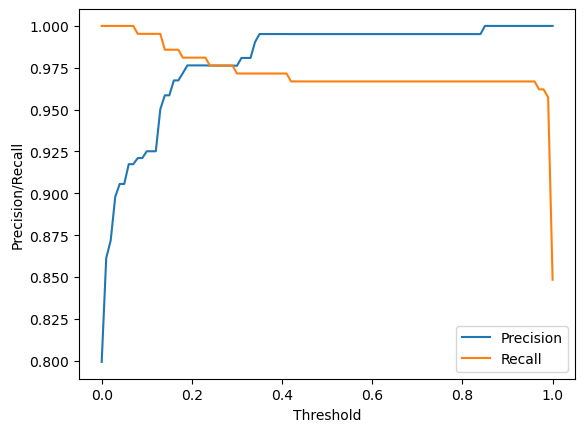

In [110]:
# Creating a plot of threshold against precision and recall
plt.plot(df_scores.threshold, df_scores['precision'], label = 'Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label = 'Recall')
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall");

In [165]:
# Picking values of where the two lines intersect
df_scores[(df_scores.precision == df_scores.recall)].values

# Dataframe only
df_scores[(df_scores.precision == df_scores.recall)]

,threshold,precision,recall
24,0.24,0.976303,0.976303
25,0.25,0.976303,0.976303
26,0.26,0.976303,0.976303
27,0.27,0.976303,0.976303
28,0.28,0.976303,0.976303
29,0.29,0.976303,0.976303


### Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing ***F1***:
                
                f1score = 2 * P * R / (P + R)  

Where ***P*** is precision and ***R*** is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

* 0.1  
* ***0.4***
* 0.6
* 0.7

In [179]:
# Creating threshold
threshold = np.linspace(0, 1, 101)
threshold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [212]:
# F1 score
df_scores['f1'] = (2 * (df_scores.precision * df_scores.recall)) / (df_scores.precision + df_scores.recall)

# Maximum values of f1
df_scores.nlargest(5, columns=['f1'])

,threshold,precision,recall,f1
35,0.35,0.995146,0.971564,0.983213
36,0.36,0.995146,0.971564,0.983213
37,0.37,0.995146,0.971564,0.983213
38,0.38,0.995146,0.971564,0.983213
39,0.39,0.995146,0.971564,0.983213


### Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

    KFold(n_splits=5, shuffle=True, random_state=1)

KFold(n_splits=5, shuffle=True, random_state=1)  

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation  

How large is standard devidation of the AUC scores across different folds?

* **0.003**
* 0.014
* 0.09
* 0.24

In [ ]:
# Importing the library
from sklearn.model_selection import KFold

In [ ]:
from tqdm.auto import tqdm

In [ ]:
# The Train Function
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient="records")
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [ ]:
# Predict Function
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient = 'records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [226]:
n_splits = 5

# Iterating various values of C
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

# We dont use the kfold but loop
for train_idx, val_idx in kfold.split(df_full_train):
    # Selcting the trained
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=10 0.996 +- 0.003


### Question 6
Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)  

Which C leads to the best mean score?

* 0.01
* 0.1
* 1
* **10**  

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [225]:
n_splits = 5

# Iterating various values of C
for C in tqdm([0.01, 0.01, 0.1, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    # We dont use the kfold but loop
    for train_idx, val_idx in kfold.split(df_full_train):
        # Selcting the trained
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.992 +- 0.006
C=0.01 0.992 +- 0.006
C=0.1 0.995 +- 0.004
C=10 0.996 +- 0.003
